#Scraping με τις βιβλιοθήκες requests και beautiful soup

## Εισαγωγή

Σ' αυτή την ενότητα θα δούμε πώς μπορούμε να φέρουμε τα περιεχόμενα μιας ιστοσελίδας στον υπολογιστή μας, ώστε να μπορούμε στη συνέχεια να τα επεξεργαστούμε και να τα αναλύσουμε.

*(μπορούμε να φέρουμε πολλές -ακόμα και όλες τις- ιστοσελίδες από ένα site, αλλά οι πολλές ιστοσελίδες είναι απλώς πολλές μοναδικές)*

### Ποια είναι η διαδικασία;

1. Εντοπίζουμε και επισκοπούμε την ιστοσελίδα που μας ενδιαφέρει
2. Φέρνουμε (κατεβάζουμε) το σύνολο των περιεχομένων της ιστοσελίδας στον υπολογιστή μας
3. Επιλέγουμε και αντλούμε από το σύνολο των περιεχομένων της ιστοσελίδας μόνο εκείνα τα στοιχεία που μας ενδιαφέρουν
4. Κατασκευάζουμε έναν οργανωμένο πίνακα με τα στοιχεία που μας ενδιαφέρουν και τον αποθηκεύουμε για μελλοντική επεξεργασία. 




###Τι θα κάνουμε σήμερα;
Σήμερα θα μαζέψουμε όλα τα άρθρα από την πρώτη σελίδα του bbc (https://www.bbc.com/news) και θα φτιάξουμε έναν πίνακα με τα εξής στοιχεία για το κάθε άρθρο: τον **τίτλο**, το **url** και την **περίληψη**.

bbc2df.png

O κώδικας στην python για να φτάσουμε από την ιστοσελίδα (αριστερά στην παραπάνω εικόνα) στο dataframe (δεξιά στην εικόνα), παρατίθεται αμεσως παρακάτω. 

In [ ]:
#####################################################
########   BBC Categories - Scraping code   #########
#####################################################

import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.bbc.com/news') 
soup = BeautifulSoup(response.text, 'html.parser')  

stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

stories_list = [] 

for story in stories: 
    story_dict = {} 
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text 
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href'] 
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text 
    
    stories_list.append(story_dict)

print(stories_list) 

import pandas as pd

df = pd.DataFrame(stories_list)
df

Όπως βλέπουμε, το μαγικό εκτελείται με μόνο λίγες γραμμές κώδικα (τον οποίο θα εξηγήσουμε παρακάτω). 

Επίσης, βλέπουμε ότι εκτός από την αρχική σελίδα του bbc.com, ο κώδικας δουλεύει και για άλλες σελίδες κατηγοριών άρθρων του bbc, π.χ. από τη σελίδα της κατηγορίας World: https://www.bbc.com/news/world.

In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.bbc.com/news/world') # αλλάζουμε το url για να φέρουμε το περιέχομενο της κατηγορίας World
soup = BeautifulSoup(response.text, 'html.parser')  

stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

stories_list = [] 

for story in stories: 
    story_dict = {} 
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text 
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href'] 
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text 
    
    stories_list.append(story_dict)

print(stories_list) 

import pandas as pd

df = pd.DataFrame(stories_list)
df

**Άσκηση**:

Πειραματιστείτε, βάζοντας στον κώδικα το url άλλων κατηγοριών άρθρων από την ιστοσελίδα του bbc (π.χ. Health, Technology κλπ.) και δείτε αν δουλεύει. 

In [ ]:
# Αντιγράψτε εδώ τον παραπάνω κώδικα του BBC Categories - Scraping Code και αλλάξτε το url στο requests.get()





Αν δοκιμάσουμε όμως να τρέξουμε τον ίδιο κώδικα σε μια σελίδα άρθρου του bbc, π.χ. από τη σελίδα https://www.bbc.com/news/world-us-canada-61301910, δεν δουλεύει.

*Για να είμαστε ακριβείς, δουλεύει, αλλά δεν δημιουργείται ο πίνακας με τα δεδομένα που θέλουμε (Τίτλος, url και περίληψη των άρθρων)*

In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.bbc.com/news/world-us-canada-61301910') # αλλάζουμε το url για να φέρουμε το περιέχομενο της σελίδας του συγκεκριμένου άρθρου
soup = BeautifulSoup(response.text, 'html.parser')  

stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

stories_list = [] 

for story in stories: 
    story_dict = {} 
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text 
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href'] 
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text 
    
    stories_list.append(story_dict)

print(stories_list) 

import pandas as pd

df = pd.DataFrame(stories_list)
df

[]


Empty DataFrame
Columns: []
Index: []

Δυστυχώς δεν δουλεύει ούτε για τη σελίδα του Guardian (https://www.theguardian.com/international).

In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.theguardian.com/international') # αλλάζουμε το url για να φέρουμε το περιέχομενο της αρχικής σελίδας του Guardian
soup = BeautifulSoup(response.text, 'html.parser')  

stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

stories_list = [] 

for story in stories: 
    story_dict = {} 
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text 
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href'] 
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text 
    
    stories_list.append(story_dict)

print(stories_list) 

import pandas as pd

df = pd.DataFrame(stories_list)
df

[]


Empty DataFrame
Columns: []
Index: []

Βασικά, δυστυχώς δε δουλεύει πουθενά αλλού, εκτός από τις σελίδες κατηγοριών άρθρων του bbc.com

**Συμπεράσματα**: 
1. Ο κώδικας για να φέρουμε περιεχόμενο από ιστοσελίδες, να επιλέξουμε από αυτό τα στοιχεία που μας ενδιαφέρουν και να τα οργανώσουμε σε ένα dataframe για να μπορούμε στη συνέχεια να τα επεξεργαστούμε και να τα αναλύσουμε, είναι απλός και σύντομος.
2. Ο κώδικας δουλεύει ως έχει σε κάποιες (ίδιας δομής) ιστοσελίδες του ίδιου site.
3. O κώδικας χρειάζεται παραμετροποίηση για να δουλέψει σε διαφορετικές ιστοσελίδες και ιστότοπους.

Γιατί συμβαίνει αυτό;

##Διαδικασία Scraping2dataframe

###1. Εντοπίζουμε και επισκοπούμε την ιστοσελίδα που μας ενδιαφέρει

Ανοίγουμε στον browser τη σελίδα https://www.bbc.com/news. Για να ανοίξουμε μια ιστοσελίδα στον browser, κάνουμε κλικ σε ένα link. Με αυτό τον τρόπο, κάνουμε ένα **request** (αίτημα) στον server που φιλοξενεί την ιστοσελίδα. 

*Δεν θα πούμε περισσότερα γι'αυτό εδώ (Θα πούμε όμως παρακάτω στο τέλος), ωστόσο, για τώρα, αρκεί να συγκρατήσουμε τη λέξη **request** καθώς και την εξής διττή σημαντική λεπτομέρεια: **α)** με κάθε request που κάνουμε, ο server του εκάστοτε ιστότοπου δουλεύει για να μας στείλει το περιεχόμενο που ζητήσαμε και **β)** για κάθε σελίδα που θέλουμε να δούμε, ενδέχεται να γίνονται ταυτόχρονα παγκοσμίως δεκάδες, εκατοντάδες ή/και χιλιάδες requests.*

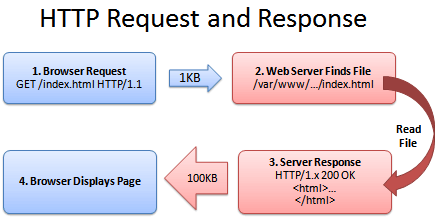

Η παραπάνω εικόνα είναι από εδώ: https://lse-my472.github.io/week03/MY472-week03-HTML-CSS.pdf

Το περιεχόμενο της αρχικής σελίδας του bbc εμφανίζεται με τρόπο που είναι εύκολα αντιληπτός και κατανοητός από τον άνθρωπο: (σχεδόν) κάθε άρθρο εμφανίζεται σαν ένα ορθογώνιο, το οποίο περιέχει μια φωτογραφία, τον τίτλο, μια σύντομη περίληψη, πριν πόση ώρα αναρτήθηκε και σε ποια κατηγορία ανήκει (π.χ. Europe, Ηealth κλπ.). Επίσης, ο τίτλος (και η φωτογραφία όταν υπάρχει) είναι υπερσύνδεσμοι (links) που οδηγούν στην αντίστοιχη ιστοσελίδα που περιέχεται ολόκληρο το άρθρο και η κατηγορία (όταν υπάρχει) είναι επίσης υπερσύνδεσμος που οδηγεί στη σελίδα της αντίστοιχης κατηγορίας.

Αυτός είναι ο τρόπος που ο browser εμφανίζει το περιεχόμενο της ιστοσελίδας για να διαβαστεί από ανθρώπους. Η ιστοσελίδα όμως καθεαυτή, πριν μορφοποιηθεί από τον browser, υπάρχει σαν html κώδικας που καταλαβαίνουν οι μηχανές. Αυτόν τον κώδικα θα πάρουμε στην python και από αυτόν τον κώδικα θα αντλήσουμε τα δεδομένα που μας ενδιαφέρουν. 

Ακριβώς γι'αυτό και **επειδή η δομή του περιεχομένου των ιστοσελίδων διαφοροποιείται από site σε site, κάθε φορά που θέλουμε να κάνουμε scraping από μια ιστοσελίδα, πρέπει να επισκοπούμε τον html κώδικά της για να καταλάβουμε ποια html tags και css classes αντιστοιχούν στην πληροφορία που μας ενδιαφέρει να συλλέξουμε**.

Μπορούμε να δούμε τον html κώδικα μιας ιστοσελίδας στον browser κάνοντας δεξί κλικ σε οποιοδήποτε σημείο της σελίδας και επιλέγοντας Inspect. Για να δούμε τον κώδικα που αντιστοιχεί σε συγκεκριμένο αντικείμενο που μας ενδιαφέρει (π.χ. στον τίτλο ενός από τα άρθρα) κάνουμε δεξί κλικ πάνω στο συγκεκριμένο αντικείμενο και επιλέγουμε Inspect.


---
Περισσότερα για την κατανόηση των βασικών html στοιχείων για web scraping, μπορείτε να διαβάσετε σε αυτό το άρθρο: https://betterprogramming.pub/understanding-html-basics-for-web-scraping-ae351ee0b3f9

####Πώς θα βρούμε τον κώδικα που αντιστοιχεί στον Τίτλο, το URL και την Περίληψη κάθε άρθρου; Πώς είναι δομημένη η αρχική σελίδα του bbc.com;

Κάνοντας δεξί κλικ και Inspect στον τίτλο ενός άρθρου στην αρχική σελίδα, φωτίζεται η γραμμή του αντίστοιχου κώδικα.

Στο `<a>` tag υπάρχει το `href` που φιλοξενεί το url του άρθρου και το `<h3>` tag με τον Τίτλο του άρθρου.

Παρακάτω, στο `<p>` tag υπάρχει η περίληψη του άρθρου (το summary).

Όλα αυτά και πολλά περισσότερα (όπως η εικόνα, η ημερομηνία και η κατηγορία) του συγκεκριμένου άρθρου, αλλά και κάθε άρθρου εντάσσονται σε ένα `<div>` με ένα `class="gs-c-promo"` (το πρώτο από αρκετά άλλα classes).

*Μπορείτε να δείτε ένα σύντομο animated gif για το συγκεκριμένο Inspect εδώ:*
https://drive.google.com/file/d/1sHTyBhzDE-HjlJt8g3P57KYeR126u-rn/view?usp=sharing

Αφού κατανοήσουμε το πώς είναι δομημένη η html της σελίδας που μας ενδιαφέρει και πού κρύβονται τα δεδομένα που θέλουμε, μπορούμε να προχωρήσουμε στη συλλογή τους με την python. 

###2. Φέρνουμε (κατεβάζουμε) το σύνολο των περιεχομένων της ιστοσελίδας στον υπολογιστή μας

Ας δούμε το μέρος του κώδικα που κατεβάζει όλη την ιστοσελίδα στον υπολογιστή μας και την ετοιμάζει έτσι ώστε να μπορούμε να καλούμε τα html tags μας ενδιαφέρουν.

In [ ]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών
import requests
from bs4 import BeautifulSoup

# Κάνουμε αίτημα (requests) στον server, για να μας φέρει (get) την ιστοσελίδα που μας ενδιαφέρει (την αρχική σελίδα του bbc, η οποία περιέχει μια σειρά από άρθρα προς ανάγνωση)
# και αποθηκεύουμε την απόκριση (response) του server σε μια μεταβλητή που ονομάζουμε response (μπορούμε να την ονομάσουμε και σκέτο r ή όπως αλλιώς θέλουμε)
response = requests.get('http://www.bbc.co.uk/news') 
# με τη χρήση της BeautifulSoup, παίρνουμε από την απόκριση του server (response) το κείμενο (.text) της ιστοσελίδας,
# το ετοιμάζουμε για να μπορούμε μετά να καλούμε html tags (html.parser) και σώζουμε το αποτέλεσμα σε μια μεταβλητή με όνομα soup
soup = BeautifulSoup(response.text, 'html.parser')  

In [ ]:
# Αυτή είναι η απάντηση του server μετά το request (το source της σελίδας)
#response.content

In [ ]:
# Αυτή είναι η html σελίδα όπως έγινε μετά το html parsing της BeautifulSoup 
#print(soup.prettify())

Μετά το html parsing μπορούμε να αναζητήσουμε τα html tags που θέλουμε, δηλαδή τα divs που έχουν class το gs-c-promo

###3. Επιλέγουμε και αντλούμε από το σύνολο των περιεχομένων της ιστοσελίδας μόνο εκείνα τα στοιχεία που μας ενδιαφέρουν

In [ ]:
# αναζητούμε στην html (στο soup) όλα τα divs (find_all) που έχουν το class 'gs-c-promo' και τα αποθηκεύουμε σαν stories
stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

In [ ]:
# το soup.find_all(), παραπάνω, επιστρέφει μια λίστα με όλα τα divs που έχουν class="gs-c-promo",
# δηλαδή το stories είναι μια λίστα με όλα τα divs που έχουν class="gs-c-promo"
stories

In [ ]:
# Εφόσον το stories είναι μια λίστα, μπορούμε να πλοηγηθούμε στα αντικείμενα που περιέχει
stories[0] # το 0 είναι το πρώτο αντικείμενο σε μια λίστα (δηλαδή, στην περίπτωσή μας, το πρώτο άρθρο/story)

In [ ]:
# Σε κάθε story (δηλαδή κάθε item της λίστας stories) μπορούμε να αναζητήσουμε τα tags που θέλουμε:

# Θέλουμε το <a> (που έχει το url του άρθρου στο href)
stories[0].find('a')

In [ ]:
# Όμως δεν θέλουμε όλο το <a>, αλλά μόνο το href
stories[0].find('a')['href']

In [ ]:
# To url είναι σχετικό, δηλαδή λείπει το κύριο μέρος του url της ιστοσελίδας που είναι https://bbc.com
# Άρα, θα πρέπει να το προσθέτουμε
"https://bbc.com" + stories[0].find('a')['href']

In [ ]:
# Θέλουμε το <h3> (τον Τίτλο του άρθρου)
stories[0].find('h3') 

In [ ]:
# Κι εδώ επίσης, δεν θέλουμε όλο το h3, αλλά μόνο το text του
stories[0].find('h3').text

In [ ]:
# Τέλος, Θέλουμε και το <p> (το summary), αλλά επίσης μόνο το text
stories[0].find('p').text

Επομένως, φτιάχνοντας μια λούπα, μπορούμε να πηγαίνουμε ένα-ένα, σε όλα τα άρθρα (σε κάθε story) της λίστας stories, να βρίσκουμε τον τίτλο, το url και το summary και να τα αποθηκεύουμε σε αντίστοιχες μεταβλητές.

Επειδή όμως, κάποιο άρθρο μπορεί να μην έχει κάποιο απ'αυτά (τίτλο, url ή summary), θα βάλουμε και ένα if statement πριν τα αποθηκεύσουμε (αλλιώς θα χτυπήσει ο κώδικας καθώς θα εκτελείται).

In [ ]:
stories_list = [] # δημιουργούμε μια κενή λίστα ([]) στην οποία θα σώζουμε τα δεδομένα που θα μαζεύουμε για την κάθε ιστορία (το κάθε άρθρο)

# Δημιουργούμε μια for loop, δηλαδή μια σειρά εντολών που επαναλαμβάνεται για κάθε 
for story in stories: # για κάθε άρθρο που υπάρχει στη λίστα stories
    story_dict = {} # φτιάξε ένα λεξικό χωρίς τίποτα
    h3 = story.find('h3') # βρες και αποθήκευσε στη μεταβλητή headline, το <h3> tag του άρθρου
    if h3: # Αν υπάρχει <h3>
      story_dict['headline'] = h3.text # αποθήκευσε στo λεξικό στο λήμμα headline, το text του <h3> tag (τίτλος) του άρθρου
    a = story.find('a') # βρες και αποθήκευσε στη μεταβλητή a, το <a> tag του άρθρου
    if a: # Αν υπάρχει <a>
      story_dict['url'] = "https://bbc.com" + a['href'] # αποθήκευσε στo λεξικό στο λήμμα url, το text του <a> tag (url) του άρθρου, προσθέτοντας στην αρχή του το κεντρικό url της σελίδας
    p = story.find('p') # βρες και αποθήκευσε στη μεταβλητή p, το text του <p> tag (summary) του άρθρου
    if p: # αν υπάρχει <p>
      story_dict['summary'] = p.text # αποθήκευσε στο λεξικό στο λήμμα summary το text του <p> tag (summary) του άρθρου
    # Αφού μαζέψαμε τα δεδομένα που μας ενδιαφέρουν για το άρθρο στο λεξικό, 
    # προσθέτουμε το λεξικό στη λίστα που δημιουργήσαμε στην αρχή (stories_list)
    # για να αποθηκεύουμε τα δεδομένα όλων των ιστοριών-άρθρων 
    stories_list.append(story_dict)

print(stories_list) # Τυπώνουμε τη λίστα όλων των ιστοριών (στην οποία αποθηκεύσαμε όλα τα λεξικά: ένα για κάθε ιστορία-άρθρο)

[{'headline': 'Putin humiliating himself on the world stage - UK', 'url': 'https://bbc.com/news/live/world-europe-61404062', 'summary': 'Foreign Secretary Liz Truss urges allies to further sanction Russia over its invasion of Ukraine.'}, {'headline': 'CCTV shows Russian soldiers killing Ukrainian civilians', 'url': 'https://bbc.com/news/world-europe-61425025', 'summary': 'The incident, captured on video seen by the BBC, is being investigated as a suspected war crime.'}, {'headline': 'North Korea announces first death from Covid-19', 'url': 'https://bbc.com/news/world-asia-61432084', 'summary': 'A day after confirming its first cases, state media reports thousands are suffering fever symptoms.'}, {'headline': 'California mansions burn as wildfires spread', 'url': 'https://bbc.com/news/world-us-canada-61430573', 'summary': 'Across North America, wildfire crews are gearing up for a particularly difficult season.'}, {'headline': 'US paratrooper killed in Alaska bear attack', 'url': 'https:

###4. Κατασκευάζουμε έναν οργανωμένο πίνακα (ένα dataframe) με τα στοιχεία που μας ενδιαφέρουν και τον αποθηκεύουμε (σαν csv) για μελλοντική επεξεργασία.

In [ ]:
# Εισαγωγή της βιβλιοθήκης των pandas
import pandas as pd

# Κατασκευή ενός dataframe από τη λίστα όλων των ιστοριών
df = pd.DataFrame(stories_list)
df # επισκόπηση του dataframe

In [ ]:
# Μετατροπή του dataframe σε CSV και αποθήκευσή του
df.to_csv("bbc.csv", index=False) # Με το index=False, αποφεύγουμε την εγγραφή του index στο csv.

**Σημείωση**: Εάν τρέχουμε τον κώδικα τοπικά στον υπολογιστή μας, το csv που δημιουργούμε θα σωθεί στον ίδιο φάκελο που υπάρχει το αρχείο με τον κώδικα της python.

Εάν όμως, δουλεύουμε στο colab, το πιθανότερο είναι ότι θα θέλουμε να σώσουμε το csv στο drive μας. Γι' αυτό, θα πρέπει πριν το σώσουμε να συνδεθούμε στο drive και να δηλώσουμε το path που θα σωθεί το csv. 

In [ ]:
from google.colab import drive # εισαγωγή της βιβλιοθήκης drive
drive.mount('gdrive') # mount ενός folder στο drive (μένει ως έχει)
ls 'gdrive/MyDrive/' # επισκόπηση των περιεχομένων του MyDrive (μένει ως έχει)
df.to_csv("/gdrive/MyDrive/SomeFolderName/bbc.csv", index=False) # εγγραφή του csv στον φάκελο που θέλουμε στο drive μας (αντικαθιστούμε το SomeFolderName με το όνομα του φακέλου που θέλουμε να σωθεί το csv)

####Ολόκληρος ο κώδικας με επεξηγηματικό σχολιασμό

In [ ]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών
import requests
from bs4 import BeautifulSoup

# Κάνουμε αίτημα (requests) στον server, για να μας φέρει (get) την ιστοσελίδα που μας ενδιαφέρει (την αρχική σελίδα του bbc, η οποία περιέχει μια σειρά από άρθρα προς ανάγνωση)
# και αποθηκεύουμε την απόκριση (response) του server σε μια μεταβλητή που ονομάζουμε response (μπορούμε να την ονομάσουμε και σκέτο r ή όπως αλλιώς θέλουμε)
response = requests.get('http://www.bbc.co.uk/news') 
# Με τη χρήση της BeautifulSoup, παίρνουμε από την απόκριση του server (response) το κείμενο (.text) της ιστοσελίδας,
# το ετοιμάζουμε για να μπορούμε μετά να καλούμε html tags (με το html.parser) και σώζουμε το αποτέλεσμα σε μια μεταβλητή με όνομα soup (επίσης μπορούμε να της δώσουμε ότι όνομα θέλουμε)
soup = BeautifulSoup(response.text, 'html.parser')  

# Αναζητούμε στην html (στο soup) όλα τα divs (find_all) που έχουν το class 'gs-c-promo' και τα αποθηκεύουμε σαν stories
stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

# Δημιουργούμε μια κενή λίστα ([]) στην οποία θα σώζουμε τα δεδομένα που θα μαζεύουμε για την κάθε ιστορία (το κάθε άρθρο)
stories_list = [] 

# Δημιουργούμε μια for loop, δηλαδή μια σειρά εντολών που επαναλαμβάνεται για κάθε ιστορία-άρθρο
for story in stories: # για κάθε άρθρο που υπάρχει στη λίστα stories
    story_dict = {} # φτιάξε ένα λεξικό χωρίς τίποτα
    h3 = story.find('h3') # βρες και αποθήκευσε στη μεταβλητή headline, το <h3> tag του άρθρου
    if h3: # Αν υπάρχει <h3>
      story_dict['headline'] = h3.text # αποθήκευσε στo λεξικό στο λήμμα headline, το text του <h3> tag (τίτλος) του άρθρου
    a = story.find('a') # βρες και αποθήκευσε στη μεταβλητή a, το <a> tag του άρθρου
    if a: # Αν υπάρχει <a>
      story_dict['url'] = "https://bbc.com" + a['href'] # αποθήκευσε στo λεξικό στο λήμμα url, το text του <a> tag (url) του άρθρου, προσθέτοντας στην αρχή του το κεντρικό url της σελίδας
    p = story.find('p') # βρες και αποθήκευσε στη μεταβλητή p, το text του <p> tag (summary) του άρθρου
    if p: # αν υπάρχει <p>
      story_dict['summary'] = p.text # αποθήκευσε στο λεξικό στο λήμμα summary το text του <p> tag (summary) του άρθρου
    # Αφού μαζέψαμε τα δεδομένα που μας ενδιαφέρουν για το άρθρο στο λεξικό, 
    # προσθέτουμε το λεξικό στη λίστα που δημιουργήσαμε στην αρχή (stories_list) για να αποθηκεύουμε τα δεδομένα όλων των ιστοριών-άρθρων 
    stories_list.append(story_dict)

print(stories_list) # Τυπώνουμε τη λίστα όλων των ιστοριών (στην οποία αποθηκεύσαμε όλα τα λεξικά: ένα για κάθε ιστορία-άρθρο)

# Εισαγωγή της βιβλιοθήκης των pandas
import pandas as pd

# Κατασκευή ενός dataframe από τη λίστα όλων των ιστοριών
df = pd.DataFrame(stories_list)
df
# Μετατροπή του dataframe σε CSV και αποθήκευσή του
#df.to_csv("full_path/bbc.csv", index=False) # Με το index=False, αποφεύγουμε την εγγραφή του index στο csv κι έτσι έχουμε ένα καλά δομημένο και εύκολα διαχειρίσιμο csv.

[{'headline': 'Putin humiliating himself on the world stage - UK', 'url': 'https://bbc.com/news/live/world-europe-61404062', 'summary': 'Foreign Secretary Liz Truss urges allies to further sanction Russia over its invasion of Ukraine.'}, {'headline': 'CCTV shows Russian soldiers killing Ukrainian civilians', 'url': 'https://bbc.com/news/world-europe-61425025', 'summary': 'The incident, captured on video seen by the BBC, is being investigated as a suspected war crime.'}, {'headline': 'North Korea announces first death from Covid-19', 'url': 'https://bbc.com/news/world-asia-61432084', 'summary': 'A day after confirming its first cases, state media reports thousands are suffering fever symptoms.'}, {'headline': 'California mansions burn as wildfires spread', 'url': 'https://bbc.com/news/world-us-canada-61430573', 'summary': 'Across North America, wildfire crews are gearing up for a particularly difficult season.'}, {'headline': 'US paratrooper killed in Alaska bear attack', 'url': 'https:



---



####**Άσκηση**

Συλλέξτε τους Τίτλους, τα urls, τα summaries και την ημερομηνία δημοσίευσης (datetime) των άρθρων που βρίσκονται στον ιστότοπο του BBC, στην κατηγορία Climate. 

**Hint** (για την ημερομηνία): δείτε με Inspect που βρίσκεται (σε ποιο tag) η ημερομηνία και με πόσες μορφές καταγράφεται. Εμείς θέλουμε το datetime, το οποίο είναι attribute του time. (https://stackoverflow.com/questions/54861335/scraping-based-on-date-with-beautifulsoup)

**Λύση**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Κατέβασμα της σελίδας Climate του bbc
response = requests.get('https://www.bbc.com/news/science-environment-56837908') 
soup = BeautifulSoup(response.text, 'html.parser') 

# Μάζεμα και αποθήκευση όλων των δεδομένων που μας ενδιαφέρουν (τίτλος, url, περίληψη, ημερομηνία, κατηγορία) για όλα τα άρθρα
climate_stories_list = [] # δημιουργία κενής λίστας για την αποθήκευση όλων των δεδομένων όλων των ιστοριών

climate_stories = soup.find_all('div', { 'class': 'gs-c-promo' })
for story in climate_stories: 
  story_dict = {} # δημιουργία κενού λεξικού για την αποθήκευση των δεδομένων κάθε ιστορίας-άρθρου
  h3 = story.find('h3') 
  if h3: 
    story_dict['headline'] = h3.text # τίτλος
  a = story.find('a') 
  if a: 
    story_dict['url'] = "https://bbc.com" + a['href'] # url
  p = story.find('p') 
  if p: 
    story_dict['summary'] = p.text # περίληψη
  time = story.find('time', {'class':'date'})
  if time:
    story_dict['datetime'] = time['datetime'] # ημερομηνία
  category = story.find('a', {'class': 'gs-c-section-link'})
  if category:
    story_dict['category'] = category.text # κατηγορία
  climate_stories_list.append(story_dict)

print(climate_stories_list)

# Δημιουργία του dataframe
climate_df = pd.DataFrame(climate_stories_list)
climate_df

####**Challenge**

Αφού όλες οι σελίδες των κατηγοριών στο bbc έχουν ίδια δομή, πώς θα μπορούσαμε να συμπληρώσουμε τον κώδικα, ώστε να τον τρέξουμε μια φορά και να πάρουμε όλους τους τίτλους, τα urls, τις περιλήψεις και τις ημερομηνίες δημοσίευσης, από όλα τα άρθρα όλων των κατηγοριών;

**Hint**: Τι θα λέγατε για μια ακόμα for loop που θα κάνει request μία-μία όλες τις ιστοσελίδες των κατηγοριών (με ενδιάμεσο sleep φυσικά); (https://stackabuse.com/guide-to-parsing-html-with-beautifulsoup-in-python/)

**Λύση**

In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://www.bbc.co.uk/news') 
soup = BeautifulSoup(response.text, 'html.parser') 

In [ ]:
# Μάζεμα όλων των urls όλων των κατηγοριών άρθρων,
# δηλαδή των href των <a> των menu-items του κύριου μενού,
# το οποίο είναι στο <nav> με class='nw-c-nav_wide)
cats = soup.find('nav', {'class': 'nw-c-nav__wide'}).find_all('a', {'class': 'nw-o-link'})
cats_urls = []
for cat in cats:
  cat_url = "https://bbc.com" + cat['href']
  cats_urls.append(cat_url)
cats_urls

In [ ]:
import time

# Δημιουργούμε μια for loop που θα κάνει request (ένα τη φορά με time.sleep(3) από όλα τα cats_urls
# και θα κάνει το κάθε response ένα dictionaryappend το κάθε response σε μια λίστα
soups = []
for cat_url in cats_urls:
  html_text = requests.get(cat_url).text
  soup = BeautifulSoup(html_text, "html.parser")
  print(f"Now Scraping - {cat_url}")
  time.sleep(3)
  soups.append(soup)

In [ ]:
all_stories_list = []
for soup in soups:
  all_stories = soup.find_all('div', { 'class': 'gs-c-promo' })
  for story in all_stories: 
    story_dict = {} 
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text 
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href']
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text  
    time = story.find('time', {'class':'date'})
    if time:
      story_dict['datetime'] = time['datetime']
    category = story.find('a', {'class': 'gs-c-section-link'})
    if category:
      story_dict['category'] = category.text
    all_stories_list.append(story_dict)

print(all_stories_list)
  

[{'headline': 'Russian battalion wiped out in failed river crossing - UK', 'url': 'https://bbc.com/news/live/world-europe-61404062', 'summary': 'Apparently severe Russian losses in the Luhansk region suggest commanders are under pressure to take risks, the UK claims.'}, {'headline': 'CCTV shows Russian soldiers killing Ukrainian civilians', 'url': 'https://bbc.com/news/world-europe-61425025', 'summary': 'The incident, captured on video seen by the BBC, is being investigated as a suspected war crime.'}, {'headline': 'Elon Musk puts $44bn Twitter deal on hold', 'url': 'https://bbc.com/news/business-61433724', 'summary': "The billionaire wants more data on fake accounts, prompting speculation over the deal's future."}, {'headline': "Worse still to come, Sri Lanka's new PM warns", 'url': 'https://bbc.com/news/world-asia-61434304', 'summary': "Sri Lanka's new PM tells the BBC the country's dire economic crisis will get worse before it gets better."}, {'headline': 'California mansions burn a

In [ ]:
all_bbc_df = pd.DataFrame(all_stories_list)
all_bbc_df

**Ολόκληρος ο κώδικας**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Κατέβασμα της αρχικής σελίδας του bbc
response = requests.get('http://www.bbc.co.uk/news') 
soup = BeautifulSoup(response.text, 'html.parser') 

# Μάζεμα όλων των urls των σελίδων όλων των κατηγοριών
cats = soup.find('nav', {'class': 'nw-c-nav__wide'}).find_all('a', {'class': 'nw-o-link'})
cats_urls = [] # δημιουργία κενής λίστας για την αποθήκευση όλων των urls των σελίδων των κατηγοριών
for cat in cats:
  cat_url = "https://bbc.com" + cat['href']
  cats_urls.append(cat_url)
cats_urls

# Μάζεμα όλων των html όλων των σελίδων
soups = [] # δημιουργία κενής λίστας για την αποθήκευση όλων των html των σελίδων των κατηγοριών
for cat_url in cats_urls:
  html_text = requests.get(cat_url).text
  soup = BeautifulSoup(html_text, "html.parser")
  print(f"Now Scraping - {cat_url}")
  time.sleep(3)
  soups.append(soup)

# Μάζεμα και αποθήκευση όλων των δεδομένων που μας ενδιαφέρουν (τίτλος, url, περίληψη, ημερομηνία, κατηγορία) για όλα τα άρθρα
all_stories_list = [] # δημιουργία κενής λίστας για την αποθήκευση όλων των δεδομένων όλων των ιστοριών
for soup in soups:
  all_stories = soup.find_all('div', { 'class': 'gs-c-promo' })
  for story in all_stories: 
    story_dict = {} # δημιουργία κενού λεξικού για την αποθήκευση των δεδομένων κάθε ιστορίας-άρθρου
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text # τίτλος
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href'] # url
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text # περίληψη
    time = story.find('time', {'class':'date'})
    if time:
      story_dict['datetime'] = time['datetime'] # ημερομηνία
    category = story.find('a', {'class': 'gs-c-section-link'})
    if category:
      story_dict['category'] = category.text # κατηγορία
    all_stories_list.append(story_dict)

print(all_stories_list)

# Δημιουργία του dataframe
all_bbc_df = pd.DataFrame(all_stories_list)
all_bbc_df

##Περισσότερα για το scraping

Όπως αναφέραμε στην αρχή, όταν κάνουμε request σε έναν server τον αναγκάζουμε να δουλέψει για να ανταποκριθεί στο αίτημά μας. Αν αυτό δεν γίνει σωστά, υπάρχει ο κίνδυνος να κάνουμε ζημιά στο server.

Επιπλέον, υπάρχουν κανόνες για το τι επιτρέπεται και τι δεν επιτρέπεται να κάνουμε με το scraping.

Κάποιες σημαντικές πληροφορίες για αυτά τα ζητήματα μπορείτε να διαβάσετε σε αυτό το άρθρο: https://www.learndatasci.com/tutorials/ultimate-guide-web-scraping-w-python-requests-and-beautifulsoup/


**Χρήσιμα άρθρα για το scraping με τις βιβλιοθήκες Requests και BeautifulSoup**:
* [Requests](https://docs.python-requests.org/en/latest/user/quickstart/) (docs.python-requests.org)
* [Guide to Parsing HTML with BeautifulSoup in Python](https://stackabuse.com/guide-to-parsing-html-with-beautifulsoup-in-python/) (stackabuse.com)
* [Understanding the HTML Basics for Web Scraping](https://betterprogramming.pub/understanding-html-basics-for-web-scraping-ae351ee0b3f9) (betterprogramming.pub)
* [Web Scraping 1: Scraping Table Data](https://towardsdatascience.com/web-scraping-scraping-table-data-1665b6b2271c) (towardsdatascience.com)
* [How to Scrape Table from Website using Python](https://medium.com/analytics-vidhya/how-to-scrape-a-table-from-website-using-python-ce90d0cfb607) (medium.com)
